# Introduction to

<img src="./julia_logo.png" alt="Julia toolchain" style="width: 400px;"/>

## Types of computer languages

* **Compiled languages**: C/C++, Fortran, ... 
  - Directly compiled to machine code that is executed by CPU 
  - Pros: fast, memory efficient
  - Cons: longer development time, hard to debug

* **Interpreted language**: R, Matlab, Python, SAS IML, JavaScript, ... 
  - Interpreted by interpreter
  - Pros: fast prototyping
  - Cons: excruciatingly slow for loops

* Mixed (dynamic) languages: Matlab (JIT), R (`compiler` package), Julia, Cython, JAVA, ...
  - Pros and cons: between the compiled and interpreted languages

* Script languages: Linux shell scripts, Perl, ...
  - Extremely useful for some data preprocessing and manipulation

* Database languages: SQL, Hadoop.  
  - Data analysis *never* happens if we do not know how to retrieve data from databases  

## Messages

* To be versatile in the big data era, master at least one language in each category.

* To improve efficiency of interpreted languages such as R or Matlab, conventional wisdom is to avoid loops as much as possible. Aka, **vectorize code**
> The only loop you are allowed to have is that for an iterative algorithm.

* When looping is necessary, need to code in C, C++, or Fortran.  
Success stories: the popular `glmnet` package in R is coded in Fortran.

* Modern languages such as Julia tries to solve the **two language problem**. That is to achieve efficiency without vectorizing code.

## What's Julia?

> Julia is a high-level, high-performance dynamic programming language for technical computing, with syntax that is familiar to users of other technical computing environments

* Started in 2009. First public release in 2012. 
  - Creators: Jeff Bezanson, Alan Edelman, Stefan Karpinski, Viral Shah
  - Current release v0.6.2
  - v1.0 is staged to release in 2018

* Aim to solve the notorious **two language problem**:
    - Prototype code goes into high-level languages like R/Python, production code goes into low-level language like C/C++
> Walks like Python. Runs like C.

<img src="./julia_vs_otherlang.png" align="center" width="600"/>

* Write high-level, abstract code that closely resembles mathematical formulas
    - yet produces fast, low-level machine code that has traditionally only been generated by static languages.

* Julia is more than just "Fast R" or "Fast Matlab"
    - Performance comes from features that work well together.  
    - You can't just take the magic dust that makes Julia fast and sprinkle it on [language of choice]

## R is great, but...

* It's not meant for high performance computing
  - http://adv-r.had.co.nz/Performance.html
    - Section on performance starts with "Why is R slow?" 

* Deficiencies in the core language 
  - Many fixed with packages (`devtools`, `roxygen2`, `Matrix`)
  - Others harder to fix (R uses an old version of BLAS)
  - Some impossible to fix (clunky syntax, poor design choices)

* Only 6 active developers left (out of 20 R-Core members)
  - JuliaLang organization has 74 members, with 567 total contributors (as of 3/3/17)
    - https://github.com/JuliaLang/julia/graphs/contributors

* Doug Bates (member of R-Core, `Matrix` and `lme4`)
    - Getting Doug on board was a big win for statistics with Julia, as he brought a lot of knowledge about the history of R development and design choices
    - https://github.com/dmbates/MixedModels.jl
    
    > As some of you may know, I have had a (rather late) mid-life crisis and run off with another language called Julia.   
    >
    > -- <cite>Doug Bates (on the `knitr` Google Group)</cite>

## Language features of R, Matlab and Julia

|        Features       |             R            |     Matlab     |        Julia        |
|:---------------------:|:------------------------:|:--------------:|:-------------------:|
|      Open source      |           👍         |      👎      |         👍        |
|          IDE          |    RStudio 👍 👍 👍 | 👍 👍 👍 |    Atom+Juno 👎   |
|    Dynamic document   | RMarkdown 👍 👍 👍 |    👍 👍   |   Jupyter 👍 👍  |
|    Multi-threading    |    `parallel` 👎  |      👍      |  👍 👍 [see docs](http://docs.julialang.org/en/stable/manual/parallel-computing/)  |
|          JIT          |    `compiler` 👎  |    👍 👍   |    👍 👍 👍   |
|     Call C/Fortran    |      wrapper, `Rcpp`     |     wrapper    | [no glue code needed](http://docs.julialang.org/en/stable/manual/calling-c-and-fortran-code/) |
|  Call shared library  |          wrapper         |     wrapper    | [no glue code needed](http://docs.julialang.org/en/stable/manual/calling-c-and-fortran-code/) |
|         Type system        |           👎           |    👍 👍   |    👍 👍 👍   |
|   Pass by reference   |           👎           |      👎      |    👍 👍 👍   |
|     Linear algebra    |           👎           |   MKL, Arpack  |  OpenBLAS, eigpack, or MKL  |
| Distributed computing |           👎           |      👍      |    👍 👍 👍   |
| Sparse linear algebra |  `Matrix` package 👎   | 👍 👍 👍 |    👍 👍 👍   |
|     Documentation     |           👍           | 👍 👍 👍 |      👍      |
|        Profiler       |    👍 👍        | 👍 👍 👍 |    👍  |

## Benchmark

* Benchmark code `R-benchmark-25.R` from [http://r.research.att.com/benchmarks/R-benchmark-25.R](http://r.research.att.com/benchmarks/R-benchmark-25.R) covers many commonly used numerical operations used in statistics. 

* We ported to [Matlab](./benchmark_matlab.m) and [Julia](./benchmark_julia.jl) and report the run times (averaged over 5 runs) here.

|                        Test                        | R 3.4.3 | Matlab R2017a | Julia 0.6.2 |
|:-------------------------------------------------- |:-------:|:-------------:|:-----------:|
| Matrix creation, trans., deform. (2500 x 2500) |   0.65  |      **0.13**     |   0.21  |
|      Power of matrix (2400 x 2400, `A.^1000`)      |   0.18  |    **0.10**   |     0.18    |
|          Quick sort ($n = 7 \times 10^6$)          |   0.75  |    **0.30**   |     0.65    |
|         Cross product (2800 x 2800, $A^TA$)        |  15.02  |    **0.18**   |  0.23  |
|            LS solution ($n = p = 2000$)            |   7.00  |    0.07   |     **0.06**    |
|                FFT ($n = 2,400,000$)               |   0.32  |    **0.03**   |     0.04    |
|           Eigen-values ($600 \times 600$)          |   0.75  |    **0.22**   |     0.26    |
|          Determinant ($2500 \times 2500$)          |   3.77  |      0.19     |   **0.14**  |
|            Cholesky ($3000 \times 3000$)           |   5.54  |    **0.08**   |     0.17    |
|         Matrix inverse ($1600 \times 1600$)        |   4.13  |    **0.11**   |     0.14    |
|           Fibonacci (vector calculation)           |   0.23  |    **0.16**   |     0.27    |
|            Hilbert (matrix calculation)            |   0.27  |      0.07     |   **0.06**  |
|                   GCD (recursion)                  |   0.42  |    **0.09**     |   0.16  |
|               Toeplitz matrix (loops)              |   0.32  |     0.0012    |  **0.0007** |
|                 Escoufiers (mixed)                 |   0.30  |      0.15     |   **0.14**  |

Machine specs: Intel i7 @ 2.9GHz (4 physical cores, 8 threads), 16G RAM, Mac OS 10.13.3.

## Gibbs sampler example by Doug Bates

* An example from Dr. Doug Bates's slides [Julia for R Programmers](http://www.stat.wisc.edu/~bates/JuliaForRProgrammers.pdf).

* The task is to create a Gibbs sampler for the density  
$$
f(x, y) = k x^2 exp(- x y^2 - y^2 + 2y - 4x), x > 0
$$
using the conditional distributions
$$
\begin{eqnarray*}
  X | Y &\sim& \Gamma \left( 3, \frac{1}{y^2 + 4} \right) \\
  Y | X &\sim& N \left(\frac{1}{1+x}, \frac{1}{2(1+x)} \right).
\end{eqnarray*}
$$

* This is a Julia function for the simple Gibbs sampler:

In [1]:
using Distributions

function jgibbs(N, thin)
    mat = zeros(N, 2)
    x = y = 0.0
    for i in 1:N
        for j in 1:thin
            x = rand(Gamma(3.0, 1.0 / (y * y + 4.0)))
            y = rand(Normal(1.0 / (x + 1.0), 1.0 / sqrt(2.0(x + 1.0))))
        end
        mat[i, 1] = x
        mat[i, 2] = y
    end
    mat
end

jgibbs (generic function with 1 method)

Generate a bivariate sample of size 10,000 with a thinning of 500. How long does it take?

In [2]:
jgibbs(100, 5); # warm-up
@elapsed jgibbs(10000, 500)

0.401717133

* R solution. The `RCall.jl` package allows us to execute R code without leaving the `Julia` environment. We first define an R function `Rgibbs()`.

In [3]:
using RCall

R"""
library(Matrix)
Rgibbs <- function(N, thin) {
  mat <- matrix(0, nrow=N, ncol=2)
  x <- y <- 0
  for (i in 1:N) {
    for (j in 1:thin) {
      x <- rgamma(1, 3, y * y + 4) # 3rd arg is rate
      y <- rnorm(1, 1 / (x + 1), 1 / sqrt(2 * (x + 1)))
    }
    mat[i,] <- c(x, y)
  }
  mat
}
"""

RCall.RObject{RCall.ClosSxp}
function (N, thin) 
{
    mat <- matrix(0, nrow = N, ncol = 2)
    x <- y <- 0
    for (i in 1:N) {
        for (j in 1:thin) {
            x <- rgamma(1, 3, y * y + 4)
            y <- rnorm(1, 1/(x + 1), 1/sqrt(2 * (x + 1)))
        }
        mat[i, ] <- c(x, y)
    }
    mat
}


and then generate the same number of samples

In [4]:
# benchmark
@elapsed R"""
system.time(Rgibbs(10000, 500))
"""

18.761212748

We see 40-80 fold speed up of `Julia` over `R` on this example, **without extra coding effort**!

## Some resources for learning Julia

0. [Intro to Julia](https://www.youtube.com/watch?v=4igzy3bGVkQ) (1h40m), by Jane Herriman (Dec 19, 2017), and next (monthly) tutorial    
[Intro to Julia](https://www.youtube.com/watch?v=JserqX6hbYw), by Jane Herriman on April 6, 2018 at 10AM PDT.  
0. Cheat sheet: [The Fast Track to Julia](https://juliadocs.github.io/Julia-Cheat-Sheet/).  
0. Browse the `Julia` [documentation](http://docs.julialang.org/en/stable/).  
0. For Matlab users, read [Noteworthy Differences From Matlab](http://docs.julialang.org/en/stable/manual/noteworthy-differences/?highlight=matlab#noteworthy-differences-from-matlab).  
For R users, read [Noteworthy Differences From R](http://docs.julialang.org/en/stable/manual/noteworthy-differences/?highlight=matlab#noteworthy-differences-from-r).  
For Python users, read [Noteworthy Differences From Python](http://docs.julialang.org/en/stable/manual/noteworthy-differences/?highlight=matlab#noteworthy-differences-from-python).  
0. The [Learning page](http://julialang.org/learning/) on Julia's website has pointers to many other learning resources.  

## Julia REPL (Read-Evaluation-Print-Loop)

The `Julia` REPL, or `Julia` shell, has four main modes.

0. Default mode is the Julian prompt `julia>`. Type backspace in other modes to enter default mode.    

0. Help mode `help?>`. Type `?` to enter help mode. `?search_term` does a fuzzy search for `search_term`.  

0. Shell mode `shell>`. Type `;` to enter shell mode.  

0. Search mode `(reverse-i-search)`. Press `ctrl+R` to enter search model. 

0. With **`RCall.jl`** package installed, we can enter the R mode by typing `$` (shift+4) at Julia REPL.

Some survival commands in Julia REPL:  
0. `quit()` or `Ctrl+D`: exit Julia.

0. `Ctrl+C`: interrupt execution.

0. `Ctrl+L`: clear screen.

0. `whos()`: list all variables in current workspace.

0. `workspace()`: clear all variables and reset session.

0. Append `;` (semi-colon) to suppress displaying output from a command.

0. `include("filename.jl")` to source a Julia code file.

## Seek help

* Online help from REPL: `?function_name`.

* Google (of course).

* Julia documentation: <https://docs.julialang.org/en/stable/>.

* Look up source code: `@edit func(x)`.

* <https://discourse.julialang.org>.

* Friends.

## Which IDE?

* I highly recommend the editor [Atom](https://atom.io) with packages `julia-client`, `language-julia`, and `latex-completions` installed. 

* If you want RStudio- or Matlab- like IDE, install the `uber-juno` package in Atom. Follow instructions at [https://github.com/JunoLab/uber-juno/blob/master/setup.md](https://github.com/JunoLab/uber-juno/blob/master/setup.md).

* [**JuliaPro**](https://juliacomputing.com/products/juliapro.html) bundles Julia, Atom, Juno, and many commonly used packages.

* For homework, I recommend [**Jupyter Notebook**](http://jupyter.org).

    Also worth trying is [JupyterLab](http://jupyterlab.readthedocs.io/en/stable/), which is supposed to replace Jupyter Notebook after it reaches v1.0.

## Julia package system

<img src="http://pkg.julialang.org/img/allver.svg" width="500" align="center"/>

* Each Julia package is a Git repository. 

* Each Julia package name ends with `.jl`.  
Google search with `PackageName.jl` usually leads to the package on github.com.  

* For example, the package called `Distributions.jl` is added with
```julia
Pkg.add("Distributions")   # no .jl 
```
and "removed" (although not completely deleted) with
```julia
Pkg.rm("Distributions")
```

* The package manager provides a dependency solver that determines which packages are actually required to be installed.

* The package ecosystem is rapidly maturing; a complete list of **registered** packages (which are required to have a certain level of testing and documentation) is at [http://pkg.julialang.org/](http://pkg.julialang.org/).

* **Non-registered** packages are added by cloning the relevant Git repository. E.g.,
```julia
Pkg.clone("git@github.com:OpenMendel/SnpArrays.jl.git")
```

* A package needs only be added once, at which point it is downloaded into your local `.julia/vx.x` directory in your home directory. If you start having problems with packages that seem to be unsolvable, you can try just deleting your .julia directory and reinstalling all your packages. 

    For JuliaPro, the packages are downloaed to directory `/Applications/JuliaPro-0.6.2.2.app/Contents/Resources/pkgs-0.6.2.2/v0.6/`.

* Periodically, you should run `Pkg.update()` which checks for, downloads and installs updated versions of all the packages you currently have installed.

* `Pkg.status()` lists the status of all installed packages.

* Using functions in package.
```julia
using Distributions
```
This pulls all of the *exported* functions in the module into your local namespace, as you can check using the `whos()` command. An alternative is
```julia
import Distributions
```
Now, the functions from the Distributions package are available only using 
```julia
Distributions.<FUNNAME>
```
All functions, not only exported functions, are always available like this.

## Calling R from Julia

* The [`RCall.jl`](https://github.com/JuliaInterop/RCall.jl) package allows you to embed R code inside of Julia.

* There are also `PyCall`, `MATLAB`, `JavaCall`, `CxxWrap` packages.

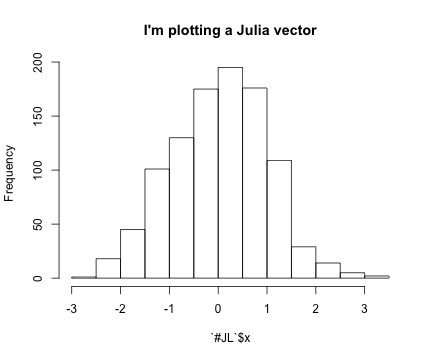

RCall.RObject{RCall.VecSxp}
$breaks
 [1] -3.0 -2.5 -2.0 -1.5 -1.0 -0.5  0.0  0.5  1.0  1.5  2.0  2.5  3.0  3.5

$counts
 [1]   1  18  45 101 130 175 195 176 109  29  14   5   2

$density
 [1] 0.002 0.036 0.090 0.202 0.260 0.350 0.390 0.352 0.218 0.058 0.028 0.010
[13] 0.004

$mids
 [1] -2.75 -2.25 -1.75 -1.25 -0.75 -0.25  0.25  0.75  1.25  1.75  2.25  2.75
[13]  3.25

$xname
[1] "`#JL`$x"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"


In [5]:
using RCall

x = randn(1000)
R"""
hist($x, main="I'm plotting a Julia vector")
"""

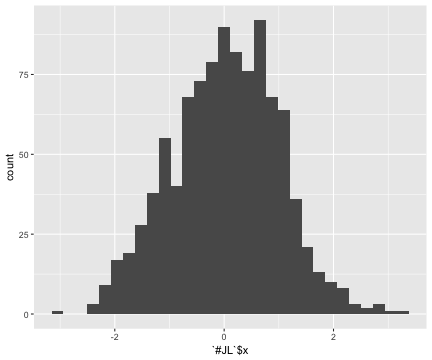

RCall.RObject{RCall.VecSxp}


In [6]:
R"""
library(ggplot2)
qplot($x) 
"""

In [7]:
x = R"""
rnorm(10)
"""

RCall.RObject{RCall.RealSxp}
 [1]  0.45983812  1.45076290 -1.23145331 -0.29818679 -1.21724410 -0.40392529
 [7]  0.01388955 -0.38015496 -1.03783810 -1.15865443


In [8]:
collect(x)

10-element Array{Float64,1}:
  0.459838 
  1.45076  
 -1.23145  
 -0.298187 
 -1.21724  
 -0.403925 
  0.0138896
 -0.380155 
 -1.03784  
 -1.15865  

Access Julia variables in R REPL mode:
```julia
julia> x = rand(5) # Julia variable
R> y <- $x
```

Pass Julia expression in R REPL mode:
```julia
R> y <- $(rand(5))
```
Put Julia variable into R environment:
```julia
julia> @rput x
R> x
```
Get R variable into Julia environment:
```julia
R> r <- 2
Julia> @rget r
```

## Some basic Julia code

In [9]:
y = 1

1

In [10]:
typeof(y) # same as int in R

Int64

In [11]:
y = 1.0

1.0

In [12]:
typeof(y) # same as double in R

Float64

In [13]:
# Greek letters:  `\pi<tab>`
θ = y + π

4.141592653589793

In [14]:
# emoji! `\:kissing_cat:<tab>`
😽 = 5.0

5.0

In [15]:
# vector Float64 0s
x = zeros(5)

5-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0

In [16]:
# vector Int64 0s
x = zeros(Int64, 5)

5-element Array{Int64,1}:
 0
 0
 0
 0
 0

In [17]:
# matrix of Float64 0s
x = zeros(5, 3)

5×3 Array{Float64,2}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [18]:
# matrix of Float64 1s
x = ones(5, 3)

5×3 Array{Float64,2}:
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0

In [19]:
# define array without initialization
x = Array{Float64}(5, 3)

5×3 Array{Float64,2}:
 6.93993e-310  6.93993e-310  6.93993e-310
 6.93993e-310  2.34283e-314  6.93993e-310
 2.34283e-314  6.93993e-310  6.93993e-310
 2.34283e-314  6.93993e-310  6.93993e-310
 2.34283e-314  6.93993e-310  6.93993e-310

In [20]:
# fill a matrix by 0s
fill!(x, 0)

5×3 Array{Float64,2}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [21]:
# uniform random numbers
x = rand(5, 3)

5×3 Array{Float64,2}:
 0.659764  0.242056  0.00655419
 0.891157  0.568443  0.452053  
 0.64122   0.755009  0.215339  
 0.083441  0.324632  0.57333   
 0.558334  0.583926  0.359651  

In [22]:
# uniform random numbers (in single precision)
x = rand(Float32, 5, 3)

5×3 Array{Float32,2}:
 0.848078  0.611432   0.713395
 0.288297  0.0540071  0.952452
 0.618352  0.110886   0.691974
 0.4709    0.551981   0.746344
 0.53267   0.566537   0.434903

In [23]:
# random numbers from {1,...,5}
x = rand(1:5, 5)

5-element Array{Int64,1}:
 2
 3
 5
 4
 5

In [24]:
# standard normal random numbers
x = randn(5, 3)

5×3 Array{Float64,2}:
 -0.213277      0.627662    -0.158419 
 -0.000320073   0.00398981  -0.285337 
  1.21825      -0.0420944    0.0597806
  1.63537      -0.0801361   -0.0209069
  0.51164      -0.114878     0.220595 

In [25]:
# range
1:10

1:10

In [26]:
typeof(1:10)

UnitRange{Int64}

In [27]:
# integers 1-10
x = collect(1:10)

10-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [28]:
# Float64 numbers 1-10
x = collect(1.0:10)

10-element Array{Float64,1}:
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0

In [29]:
# convert to a specific type
convert(Vector{Float64}, 1:10)

10-element Array{Float64,1}:
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0

## Timing and benchmark

In [30]:
srand(123) # seed
x = randn(1000)
@time sum(x) # first run includes compilation time
@time sum(x) # no compilation time after first run

  0.029252 seconds (9.81 k allocations: 541.754 KiB)
  0.000003 seconds (5 allocations: 176 bytes)


25.797499734233416

Use `BenchmarkTools.jl` for more robust benchmarking. Analog of `microbenchmark` package in R.

In [31]:
using BenchmarkTools

@benchmark sum(x)

BenchmarkTools.Trial: 
  memory estimate:  16 bytes
  allocs estimate:  1
  --------------
  minimum time:     298.747 ns (0.00% GC)
  median time:      300.605 ns (0.00% GC)
  mean time:        314.562 ns (0.33% GC)
  maximum time:     5.791 μs (91.52% GC)
  --------------
  samples:          10000
  evals/sample:     257

## Matrices and vectors

### Indexing

In [32]:
# 5 × 5 matrix of random Normal(0, 1)
x = randn(5, 5) 

# get first column
x[:, 1]

5-element Array{Float64,1}:
  1.14112 
  0.597106
 -1.30405 
 -1.2566  
 -0.706518

In [33]:
# get first row
x[1, :]

5-element Array{Float64,1}:
 1.14112
 1.38036
 1.32415
 1.63371
 1.88523

In [34]:
# sub-array
x[1:2, 2:3]

2×2 Array{Float64,2}:
  1.38036    1.32415 
 -0.826625  -0.585232

In [35]:
# getting a subset of a matrix creates a copy, but you can also create "views"
view(x, 1:2, 2:3)

2×2 SubArray{Float64,2,Array{Float64,2},Tuple{UnitRange{Int64},UnitRange{Int64}},false}:
  1.38036    1.32415 
 -0.826625  -0.585232

### Concatenate matrices

In [36]:
x, y, z = randn(5, 3), randn(5, 2), randn(3, 5)
M = [x y]

5×5 Array{Float64,2}:
  0.418384  -0.529049   0.062004  -0.510386   0.552569
 -1.03348   -0.491146  -0.766275   0.795393  -0.329389
 -0.18858    0.216474   0.321596  -0.17812    1.52644 
  1.23724   -0.411826   0.259378   0.661116  -0.946875
  2.45988    0.196139   1.252      1.01505    0.542487

In [37]:
M = [x y; z]

8×5 Array{Float64,2}:
  0.418384   -0.529049   0.062004  -0.510386   0.552569
 -1.03348    -0.491146  -0.766275   0.795393  -0.329389
 -0.18858     0.216474   0.321596  -0.17812    1.52644 
  1.23724    -0.411826   0.259378   0.661116  -0.946875
  2.45988     0.196139   1.252      1.01505    0.542487
 -2.52921    -0.760777  -1.31071    1.32052   -1.17582 
  0.0353449  -0.10357    0.510273  -0.682516  -1.25411 
 -0.946069   -0.185653  -1.61549    0.255174   0.391511

### Basic linear algebra

In [38]:
x = randn(5)

5-element Array{Float64,1}:
 0.157199
 0.164931
 3.05432 
 1.57089 
 0.515944

In [39]:
# vector L2 norm
vecnorm(x)

3.4806115606810417

In [40]:
y = randn(5) # another vector
# dot product
dot(x, y)

2.0927593394717907

In [1]:
x, y = randn(5, 3), randn(3, 2)
# matrix multiplication, same as %*% in R
x * y

5×2 Array{Float64,2}:
  2.05663   -0.167818
 -0.150014  -1.73337 
  2.25956    4.89    
 -0.328218  -3.32091 
 -0.63189   -5.39621 

In [2]:
x = randn(3, 3)

3×3 Array{Float64,2}:
 -0.628509   2.28655    1.15971 
 -0.668575  -2.29994   -0.406255
 -0.517757  -0.205815   0.640885

In [3]:
# transpose(x)
x'

3×3 Array{Float64,2}:
 -0.628509  -0.668575  -0.517757
  2.28655   -2.29994   -0.205815
  1.15971   -0.406255   0.640885

In [4]:
trace(x)

-2.2875594974833877

In [5]:
det(x)

1.218249375938875

In [6]:
rank(x)

3

### Sparse Matrices

In [7]:
# 10-by-10 sparse matrix with sparsity 0.1
X = sprandn(10, 10, .1)

10×10 SparseMatrixCSC{Float64,Int64} with 8 stored entries:
  [6 ,  1]  =  1.4519
  [7 ,  1]  =  1.50701
  [1 ,  2]  =  0.802651
  [7 ,  3]  =  0.77196
  [8 ,  4]  =  0.231363
  [3 ,  7]  =  -0.628583
  [3 , 10]  =  0.286841
  [9 , 10]  =  -0.432488

In [8]:
# convert to dense matrix; be cautious when dealing with big data
Xfull = full(X)

10×10 Array{Float64,2}:
 0.0      0.802651  0.0      0.0       …  0.0   0.0       0.0  0.0   0.0     
 0.0      0.0       0.0      0.0          0.0   0.0       0.0  0.0   0.0     
 0.0      0.0       0.0      0.0          0.0  -0.628583  0.0  0.0   0.286841
 0.0      0.0       0.0      0.0          0.0   0.0       0.0  0.0   0.0     
 0.0      0.0       0.0      0.0          0.0   0.0       0.0  0.0   0.0     
 1.4519   0.0       0.0      0.0       …  0.0   0.0       0.0  0.0   0.0     
 1.50701  0.0       0.77196  0.0          0.0   0.0       0.0  0.0   0.0     
 0.0      0.0       0.0      0.231363     0.0   0.0       0.0  0.0   0.0     
 0.0      0.0       0.0      0.0          0.0   0.0       0.0  0.0  -0.432488
 0.0      0.0       0.0      0.0          0.0   0.0       0.0  0.0   0.0     

In [9]:
# convert a dense matrix to sparse matrix
sparse(Xfull)

10×10 SparseMatrixCSC{Float64,Int64} with 8 stored entries:
  [6 ,  1]  =  1.4519
  [7 ,  1]  =  1.50701
  [1 ,  2]  =  0.802651
  [7 ,  3]  =  0.77196
  [8 ,  4]  =  0.231363
  [3 ,  7]  =  -0.628583
  [3 , 10]  =  0.286841
  [9 , 10]  =  -0.432488

In [10]:
# syntax for sparse linear algebra is same as dense linear algebra
β = ones(10)
X * β

10-element Array{Float64,1}:
  0.802651
  0.0     
 -0.341743
  0.0     
  0.0     
  1.4519  
  2.27897 
  0.231363
 -0.432488
  0.0     

In [11]:
# many functions apply to sparse matrices as well
sum(X, 2)

10×1 Array{Float64,2}:
  0.802651
  0.0     
 -0.341743
  0.0     
  0.0     
  1.4519  
  2.27897 
  0.231363
 -0.432488
  0.0     

## Control flow and loops

* if-elseif-else-end
```julia
if condition1
    # do something
elseif condition2
    # do something
else
    # do something
end
```

* `for` loop
```julia
for i in 1:10
    println(i)
end
```

* Nested `for` loop:
```julia
for i in 1:10
    for j in 1:5
        println(i * j)
    end
end
```
Same as
```julia
for i in 1:10, j in 1:5
    println(i * j)
end
```

* Exit loop:
```julia
for i in 1:10
    # do something
    if condition1
        exit # skip remaining loop
    end
end
```

* Exit iteration:  
```julia
for i in 1:10
    # do something
    if condition1
        continue # skip to next iteration
    end
    # do something
end
```

## Functions 

* In Julia, all arguments to functions are **passed by reference**, in contrast to R and Matlab.

* Function names ending with `!` indicates that function mutates at least one argument, typically the first.
```julia
sort!(x) # vs sort(x)
```

* Function definition
```julia
function func(req1, req2; key1=dflt1, key2=dflt2)
    # do stuff
    return out
end
```
**Required arguments** are separated with a comma and use the positional notation.  
**Optional arguments** need a default value in the signature.  
**Semicolon** is not required in function call.  
**return** statement is optional.  
Multiple outputs can be returned as a tuple, e.g., `return out1, out2, out3`.  

* Anonymous functions, e.g., `x -> x^2`, is commonly used in collection function or list comprehensions.
```julia
map(x -> x^2, x) # square each element in x
```

* Functions can be nested:
```julia
function outerfunction()
    # do some outer stuff
    function innerfunction()
        # do inner stuff
        # can access prior outer definitions
    end
    # do more outer stuff
end
```

* Functions can be vectorized using the Dot syntax:

In [12]:
function myfunc(x)
    return sin(x^2)
end

x = randn(5, 3)
myfunc.(x)

5×3 Array{Float64,2}:
 0.232332   0.942232   0.661995 
 0.0619495  0.364964   0.648928 
 0.999867   0.022896   0.013523 
 0.585791   0.877611   0.0347622
 0.0358096  0.0602245  0.824438 

* **Collection function** (think this as the series of `apply` functions in R).

    Apply a function to each element of a collection:
```julia
map(f, coll) # or
map(coll) do elem
    # do stuff with elem
    # must contain return
end
```

In [13]:
map(x -> sin(x^2), x)

5×3 Array{Float64,2}:
 0.232332   0.942232   0.661995 
 0.0619495  0.364964   0.648928 
 0.999867   0.022896   0.013523 
 0.585791   0.877611   0.0347622
 0.0358096  0.0602245  0.824438 

In [14]:
# Mapreduce
mapreduce(x -> sin(x^2), +, x)

6.367321998150688

In [15]:
sum(x -> sin(x^2), x)

6.367321998150688

* List comprehension

In [16]:
[sin(randn()^2) for i in 1:5, j in 1:3]

5×3 Array{Float64,2}:
 0.271351    0.203594  0.45518 
 0.458718    0.103082  0.905506
 0.887009    0.477886  0.976622
 0.00246957  0.57626   0.102075
 0.00879085  0.960025  0.996745

## Type system

* When thinking about types, think about sets.

* Everything is a subtype of the abstract type `Any`.

* An abstract type defines a set of types
    - Consider types in Julia that are a `Number`:

<img src="tree.png" width="600" align="center"/>

* You can explore type hierarchy with `typeof()`, `supertype()`, and `subtypes()`.

In [17]:
typeof(1.0), typeof(1)

(Float64, Int64)

In [18]:
supertype(Float64)

AbstractFloat

In [19]:
subtypes(AbstractFloat)

4-element Array{Union{DataType, UnionAll},1}:
 BigFloat
 Float16 
 Float32 
 Float64 

In [20]:
# Is Float64 a subtype of AbstractFloat?
Float64 <: AbstractFloat

true

## Multiple dispatch

* Multiple dispatch lies in the core of Julia design. It allows built-in and user-defined functions to be overloaded for different combinations of argument types.

* Let's consider a simple "doubling" function:

In [21]:
g(x) = x + x

g (generic function with 1 method)

This definition is too broad, since some things can't be added 

In [22]:
g("hello world")

LoadError: [91mMethodError: no method matching +(::String, ::String)[0m
Closest candidates are:
  +(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at operators.jl:424[39m

* This definition is correct but too restrictive, since any `Number` can be added.

In [23]:
g(x::Float64) = x + x

g (generic function with 2 methods)

* This will automatically work on the entire type tree above!

In [24]:
g(x::Number) = x + x

g (generic function with 3 methods)

This is a lot nicer than 
```julia
function g(x)
    if isa(x, Number)
        return x + x
    else
        throw(ArgumentError("x should be a number"))
    end
end
```

* `methods(func)` function display all methods defined for `func`.

In [25]:
methods(g)

# 3 methods for generic function "g":
g(x::Float64) in Main at In[23]:1
g(x::Number) in Main at In[24]:1
g(x) in Main at In[21]:1

* `@which func(x)` marco tells which method is being used for argument signature `x`.

In [26]:
x = Int8(1)
typeof(x)

Int8

In [27]:
@which g(x)

g(x::Number) in Main at In[24]:1

In [28]:
x = randn(5)
@which g(x)

g(x) in Main at In[21]:1

## Just-in-time compilation (JIT)

Following figures and some examples are taken from Arch D. Robinson's slides [Introduction to Writing High Performance Julia](https://docs.google.com/viewer?a=v&pid=sites&srcid=ZGVmYXVsdGRvbWFpbnxibG9uem9uaWNzfGd4OjMwZjI2YTYzNDNmY2UzMmE).

| <img src="./julia_toolchain.png" alt="Julia toolchain" style="width: 400px;"/> | <img src="./julia_introspect.png" alt="Julia toolchain" style="width: 500px;"/> |
|----------------------------------|------------------------------------|
|||

In [29]:
x = randn(100)
@time sum(x) # first call invokes compilation
@time sum(x); # second run doesn't need compilation anymore

  0.030172 seconds (912 allocations: 57.178 KiB)
  0.000002 seconds (5 allocations: 176 bytes)


* `Julia`'s efficiency results from its capabilities to infer the types of *all* variables within a function and then call LLVM to generate optimized machine code at run-time. 

In [30]:
workspace() # clear previous definition of g
g(x) = x + x

g (generic function with 1 method)

This function will work on **any** type which has a method for `+`.

In [31]:
@show g(2)
@show g(2.0);

g(2) = 4
g(2.0) = 4.0


This is the [abstract syntax tree (AST)](https://en.wikipedia.org/wiki/Abstract_syntax_tree).

In [32]:
@code_lowered g(2)

CodeInfo(:(begin 
        nothing
        return x + x
    end))

Peek at the compiled **LLVM bitcode** with `@code_llvm`

In [33]:
@code_llvm g(2)


define i64 @julia_g_63109(i64) #0 !dbg !5 {
top:
  %1 = shl i64 %0, 1
  ret i64 %1
}


In [34]:
@code_llvm g(2.0)


define double @julia_g_63116(double) #0 !dbg !5 {
top:
  %1 = fadd double %0, %0
  ret double %1
}


We didn't provide a type annotation. But different code gets called depending on the argument type!

* In R or Python, `g(2)` and `g(2.0)` would use the same code for both.
 
* In Julia, `g(2)` and `g(2.0)` dispatches to optimized code for `Int64` and `Float64`, respectively.

* For integer input `x`, LLVM compiler is smart enough to know `x + x` is simple shifting `x` by 1 bit, which is faster than addition.
 
Lowest level is the **assembly code**, which is machine dependent.

In [35]:
@code_native g(2)

	.section	__TEXT,__text,regular,pure_instructions
Filename: In[30]
	pushq	%rbp
	movq	%rsp, %rbp
Source line: 2
	leaq	(%rdi,%rdi), %rax
	popq	%rbp
	retq
	nopw	(%rax,%rax)


In [36]:
@code_native g(2.0)

	.section	__TEXT,__text,regular,pure_instructions
Filename: In[30]
	pushq	%rbp
	movq	%rsp, %rbp
Source line: 2
	addsd	%xmm0, %xmm0
	popq	%rbp
	retq
	nopw	(%rax,%rax)


## Profiling Julia code

Julia has several built-in tools for profiling. The `@time` marco outputs run time and heap allocation.

In [37]:
function tally(x)
    s = 0
    for v in x
        s += v
    end
    s
end

a = rand(10000)
@time tally(a) # warm up: include compile time

  0.012463 seconds (31.34 k allocations: 538.791 KiB)


4950.583166002084

In [38]:
@time tally(a)

  0.000249 seconds (30.00 k allocations: 468.906 KiB)


4950.583166002084

For more robust benchmarking, the [BenchmarkTools.jl](https://github.com/JuliaCI/BenchmarkTools.jl) package is highly recommended.

In [39]:
using BenchmarkTools

@benchmark tally(a)

BenchmarkTools.Trial: 
  memory estimate:  468.75 KiB
  allocs estimate:  30000
  --------------
  minimum time:     161.231 μs (0.00% GC)
  median time:      181.683 μs (0.00% GC)
  mean time:        203.119 μs (7.09% GC)
  maximum time:     1.526 ms (80.05% GC)
  --------------
  samples:          10000
  evals/sample:     1

We see the memory allocation (468.75 KiB, average 10.73% GC) is suspiciously high.

The `Profile` module gives line by line profile results.

In [40]:
a = rand(10000000)
Profile.clear()
@profile tally(a)
Profile.print(format=:flat)

 Count File                        Line Function                               
   346 ./<missing>                   -1 anonymous                              
     3 ./In[37]                       3 tally(::Array{Float64,1})              
   342 ./In[37]                       4 tally(::Array{Float64,1})              
     1 ./abstractarray.jl           573 copy!(::Array{Any,1}, ::Core.Infere... 
     1 ./array.jl                   396 _collect(::Type{Any}, ::Core.Infere... 
     1 ./array.jl                   393 collect(::Type{Any}, ::Core.Inferen... 
     3 ./float.jl                   375 +(::Float64, ::Float64)                
     1 ./generator.jl                45 next(::Core.Inference.Generator{Arr... 
     2 ./inference.jl              1897 abstract_call(::Any, ::Array{Any,1}... 
     2 ./inference.jl              1420 abstract_call_gf_by_type(::Any, ::A... 
     3 ./inference.jl              1950 abstract_eval(::Any, ::Array{Any,1}... 
     1 ./inference.jl              1901 

## Memory profiling

Detailed memory profiling requires a detour. First let's write a script `bar.jl`, which contains the workload function `tally` and a wrapper for profiling.

In [41]:
;cat bar.jl

function tally(x)
    s = 0
    for v in x
        s += v
    end
    s
end

# call workload from wrapper to avoid misattribution bug
function wrapper()
    y = rand(10000)
    # force compilation
    println(tally(y))
    # clear allocation counters
    Profile.clear_malloc_data()
    # run compiled workload
    println(tally(y))
end

wrapper()


Next, in terminal, we run the script with `--track-allocation=user` option.

In [42]:
;julia --track-allocation=user bar.jl

5004.272508552988
5004.272508552988


The profiler outputs a file `bar.jl.mem`.

In [43]:
;cat bar.jl.mem

        - function tally(x)
        0     s = 0
        0     for v in x
   479984         s += v
        -     end
        0     s
        - end
        - 
        - # call workload from wrapper to avoid misattribution bug
        - function wrapper()
        0     y = rand(10000)
        -     # force compilation
        0     println(tally(y))
        -     # clear allocation counters
        0     Profile.clear_malloc_data()
        -     # run compiled workload
      192     println(tally(y))
        - end
        - 
        - wrapper()
        - 


We see line 4 is allocating suspicious amount of heap memory. 

## Type stability

The key to writing performant Julia code is to be [**type stable**](https://docs.julialang.org/en/stable/manual/performance-tips/#Write-"type-stable"-functions-1), such that `Julia` is able to infer types of all variables and output of a function from the types of input arguments. 

Is the `tally` function type stable? How to diagnose and fix it?

In [44]:
@code_warntype tally(rand(100))

Variables:
  #self# <optimized out>
  x::Array{Float64,1}
  v::Float64
  #temp#@_4::Int64
  s::Union{Float64, Int64}
  #temp#@_6::Core.MethodInstance
  #temp#@_7::Float64

Body:
  begin 
      s::Union{Float64, Int64} = 0 # line 3:
      #temp#@_4::Int64 = 1
      4: 
      unless (Base.not_int)((#temp#@_4::Int64 === (Base.add_int)((Base.arraylen)(x::Array{Float64,1})::Int64, 1)::Int64)::Bool)::Bool goto 29
      SSAValue(2) = (Base.arrayref)(x::Array{Float64,1}, #temp#@_4::Int64)::Float64
      SSAValue(3) = (Base.add_int)(#temp#@_4::Int64, 1)::Int64
      v::Float64 = SSAValue(2)
      #temp#@_4::Int64 = SSAValue(3) # line 4:
      unless (s::Union{Float64, Int64} isa Int64)::Bool goto 14
      #temp#@_6::Core.MethodInstance = MethodInstance for +(::Int64, ::Float64)
      goto 23
      14: 
      unless (s::Union{Float64, Int64} isa Float64)::Bool goto 18
      #temp#@_6::Core.MethodInstance = MethodInstance for +(::Float64, ::Float64)
      goto 23
      18: 
      goto 20
      20

In this case, Julia fails to infer the type of the reduction variable `s`, which has to be **boxed** in heap memory at run time.

<img src="https://www.codeproject.com/KB/dotnet/6importentStepsDotNet/14.jpg" width="400" align="center"/>

<img src="https://i-msdn.sec.s-msft.com/dynimg/IC97798.jpeg" width="300" align="center"/>

This is the LLVM bitcode:

In [45]:
@code_llvm tally(rand(100))


define { i8**, i8 } @julia_tally_63189([8 x i8]* noalias nocapture, i8** dereferenceable(40)) #0 !dbg !5 {
top:
  %2 = call i8**** @jl_get_ptls_states() #5
  %3 = alloca [8 x i8**], align 8
  %.sub = getelementptr inbounds [8 x i8**], [8 x i8**]* %3, i64 0, i64 0
  %4 = getelementptr [8 x i8**], [8 x i8**]* %3, i64 0, i64 5
  %5 = getelementptr [8 x i8**], [8 x i8**]* %3, i64 0, i64 2
  %6 = getelementptr [8 x i8**], [8 x i8**]* %3, i64 0, i64 4
  %7 = bitcast i8*** %4 to i8*
  call void @llvm.memset.p0i8.i32(i8* %7, i8 0, i32 24, i32 8, i1 false)
  %8 = bitcast [8 x i8**]* %3 to i64*
  %9 = bitcast i8*** %5 to i8*
  call void @llvm.memset.p0i8.i64(i8* %9, i8 0, i64 16, i32 8, i1 false)
  store i64 12, i64* %8, align 8
  %10 = bitcast i8**** %2 to i64*
  %11 = load i64, i64* %10, align 8
  %12 = getelementptr [8 x i8**], [8 x i8**]* %3, i64 0, i64 1
  %13 = bitcast i8*** %12 to i64*
  store i64 %11, i64* %13, align 8
  store i8*** %.sub, i8**** %2, align 8
  store i8** null, i8*** %6,

What's the fix?

In [46]:
function tally2(x)
    s = zero(eltype(x))
    for v in x
        s += v
    end
    s
end

tally2 (generic function with 1 method)

In [49]:
@benchmark tally2(a)

BenchmarkTools.Trial: 
  memory estimate:  16 bytes
  allocs estimate:  1
  --------------
  minimum time:     11.279 ms (0.00% GC)
  median time:      12.461 ms (0.00% GC)
  mean time:        12.791 ms (0.00% GC)
  maximum time:     17.097 ms (0.00% GC)
  --------------
  samples:          391
  evals/sample:     1

In [50]:
@code_llvm tally2(a)


define double @julia_tally2_63652(i8** dereferenceable(40)) #0 !dbg !5 {
top:
  %1 = getelementptr inbounds i8*, i8** %0, i64 1
  %2 = bitcast i8** %1 to i64*
  %3 = load i64, i64* %2, align 8
  %4 = icmp eq i64 %3, 0
  br i1 %4, label %L14, label %if.lr.ph

if.lr.ph:                                         ; preds = %top
  %5 = getelementptr i8*, i8** %0, i64 3
  %6 = bitcast i8** %5 to i64*
  %7 = load i64, i64* %6, align 8
  %8 = bitcast i8** %0 to double**
  %9 = load double*, double** %8, align 8
  br label %if

if:                                               ; preds = %if.lr.ph, %idxend
  %s.06 = phi double [ 0.000000e+00, %if.lr.ph ], [ %16, %idxend ]
  %"#temp#.05" = phi i64 [ 1, %if.lr.ph ], [ %15, %idxend ]
  %10 = add i64 %"#temp#.05", -1
  %11 = icmp ult i64 %10, %7
  br i1 %11, label %idxend, label %oob

L14.loopexit:                                     ; preds = %idxend
  br label %L14

L14:                                              ; preds = %L14.loopexit, %top
  %

## Plotting in Julia

The three most popular options (as far as I know) in Julia are
- [Gadfly.jl](https://github.com/GiovineItalia/Gadfly.jl)
    - Julia equivalent of `ggplot2` in R
    
    
- [PyPlot.jl](https://github.com/JuliaPy/PyPlot.jl)
    - Wrapper for Python's matplotlib
    
    
- [Plots.jl](https://github.com/JuliaPlots/Plots.jl)
    - Defines an unified interface for plotting
    - maps arguments to different plotting "backends"
        - PyPlot, GR, PlotlyJS, and many more

In [51]:
using Plots

x = randn(50, 2);

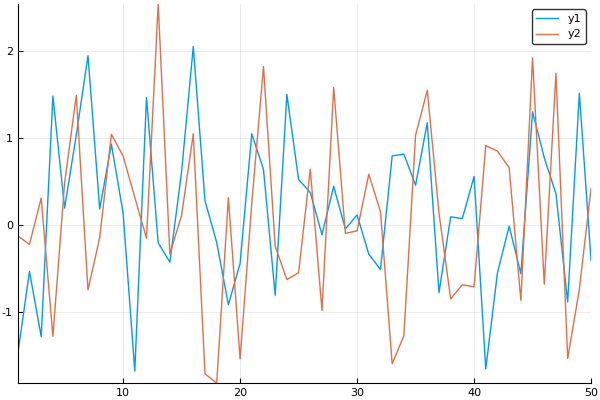

In [52]:
pyplot()  # set the backend to PyPlot
plot(x)

In [56]:
plotlyjs()  # change backend to Plotly
plot(x)

ErrorException: [91mCannot find Electron. Try `Blink.AtomShell.install()`.[39m

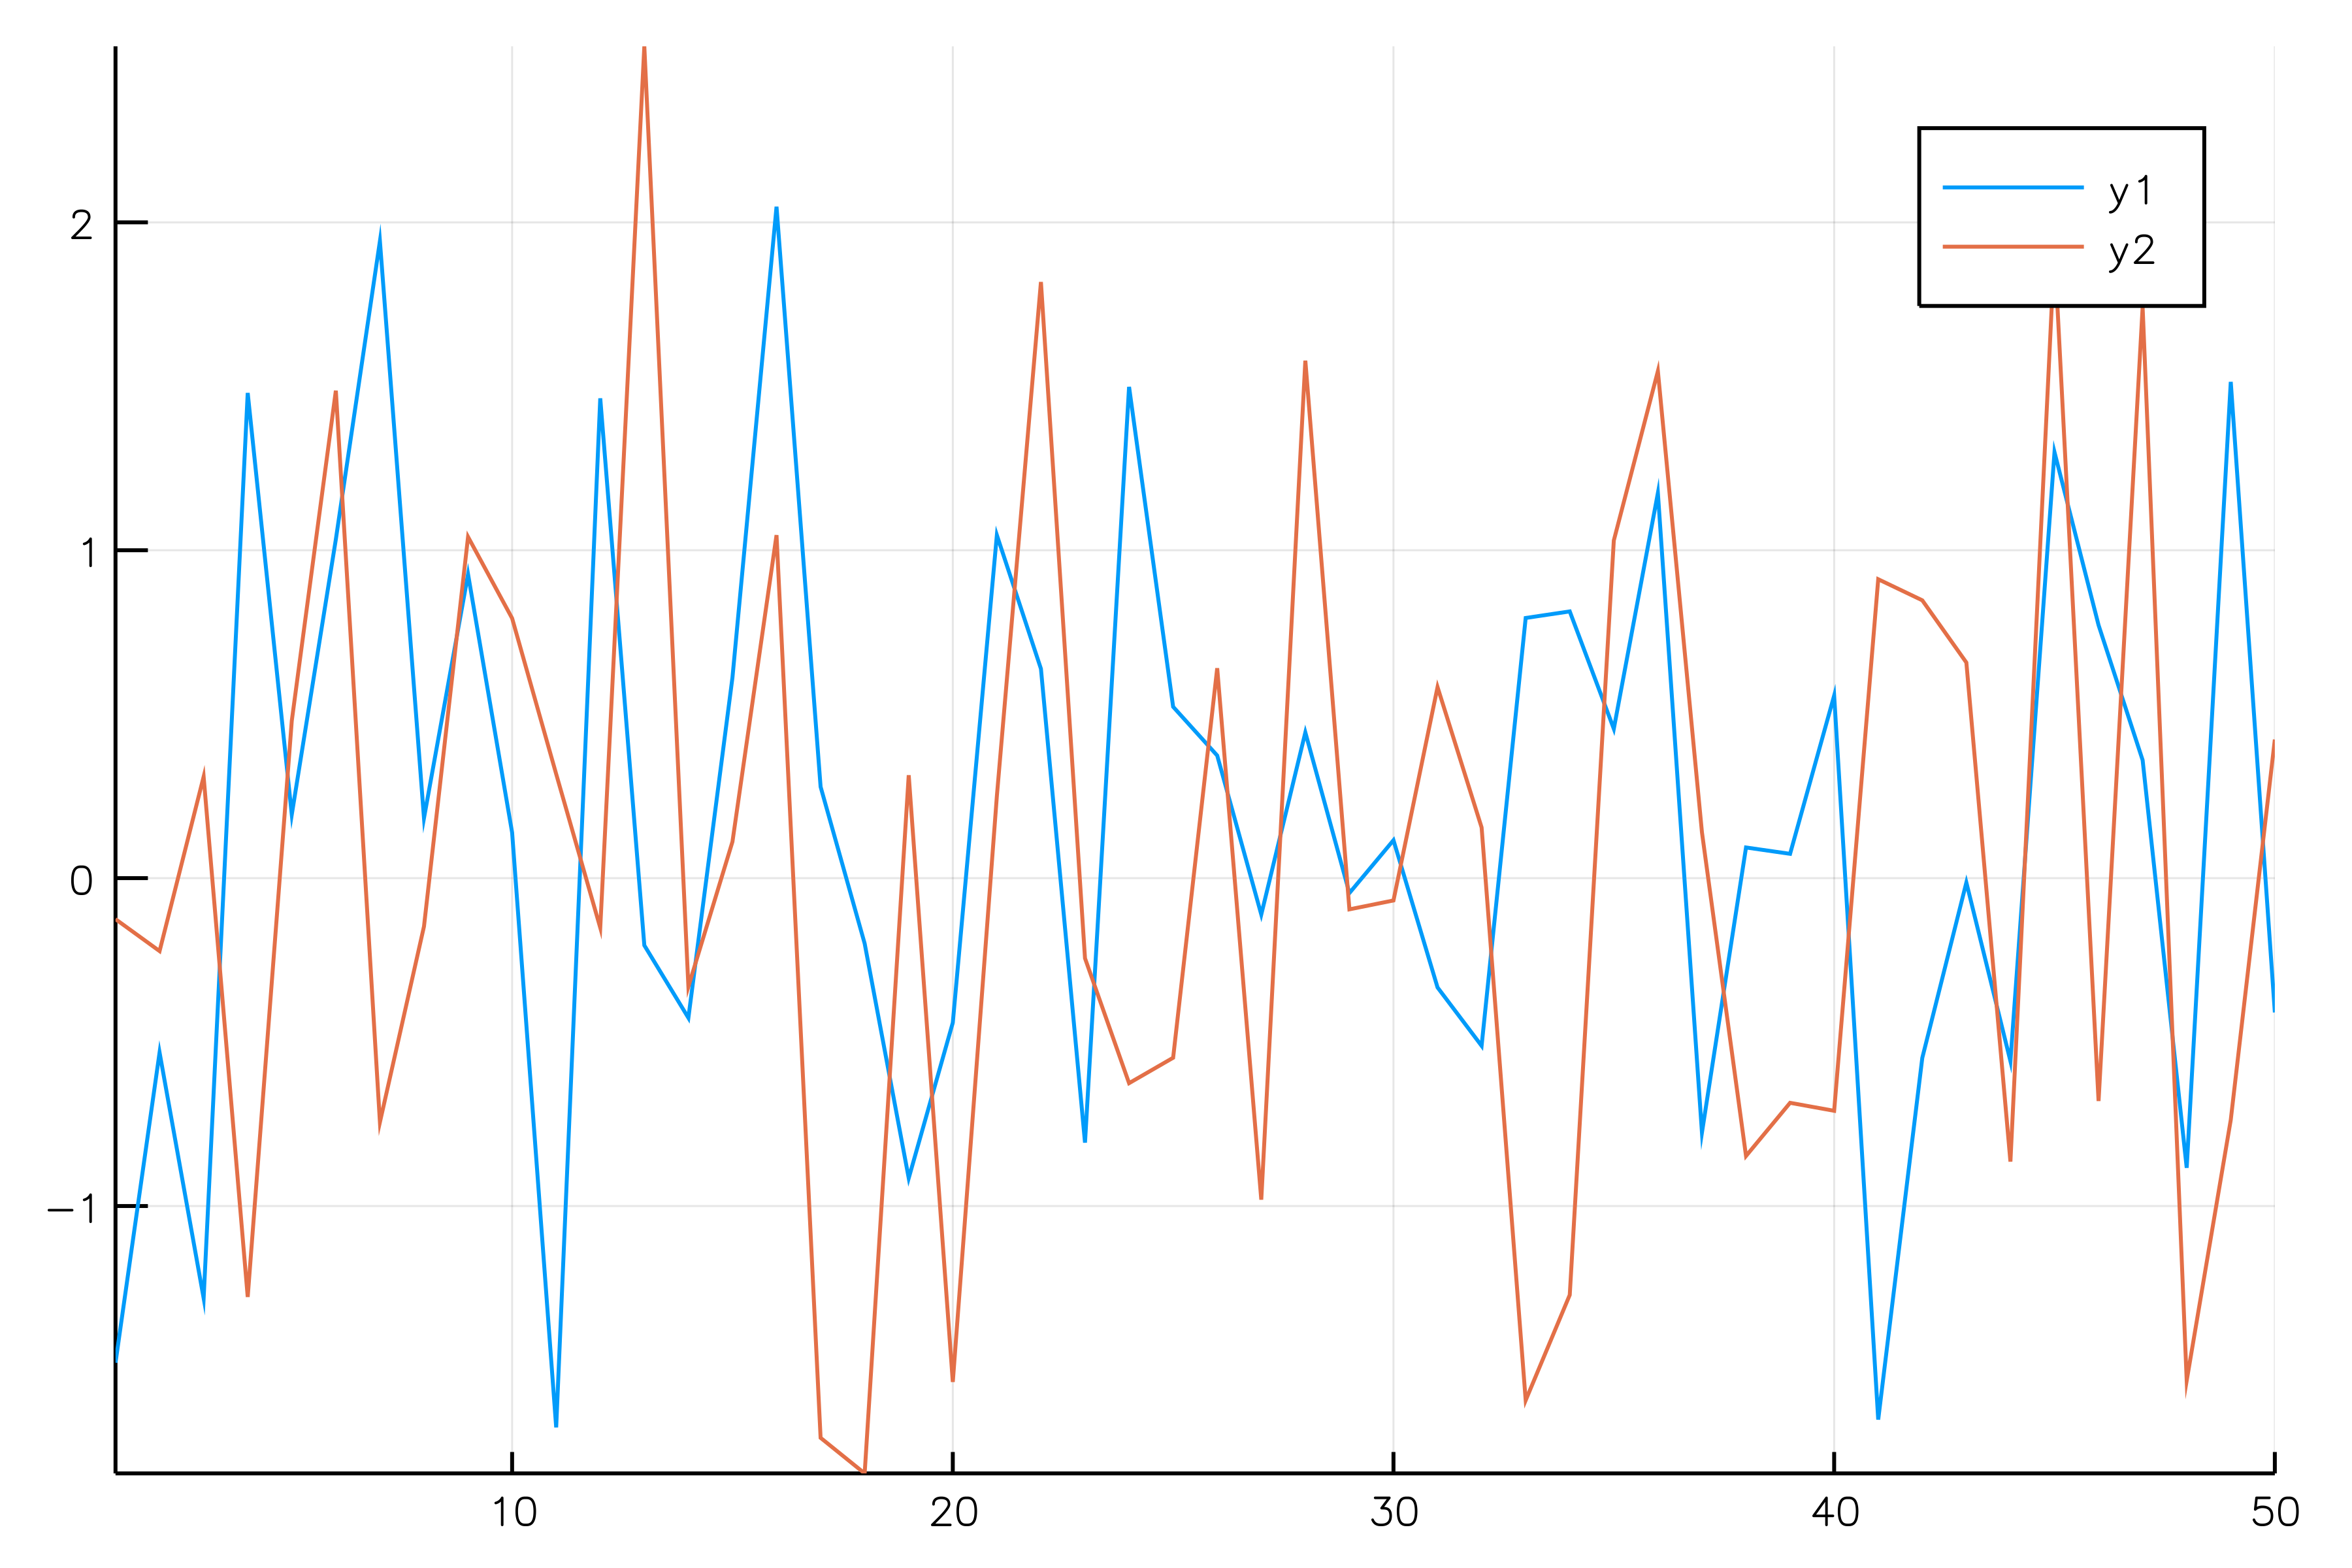

In [57]:
gr()   # change backend to GR
plot(x)

In [58]:
gr()
@gif for i in 1:20
    plot(x -> sin(x) / (.2i), 0, i, xlim=(0, 20), ylim=(-.75, .75))
    scatter!(x -> cos(x) * .01 * i, 0, i, m=1)
end

INFO: Saved animation to /var/folders/y2/q2z735tj4cx11xzrr53z44c40000gn/T/juliaOPWlw3.gif


Plots.AnimatedGif("/var/folders/y2/q2z735tj4cx11xzrr53z44c40000gn/T/juliaOPWlw3.gif")

<img src="./tmp.gif" style="width: 600px;"/>

In [55]:
versioninfo()

Julia Version 0.6.2
Commit d386e40* (2017-12-13 18:08 UTC)
Platform Info:
  OS: macOS (x86_64-apple-darwin15.6.0)
  CPU: Intel(R) Core(TM) i7-6920HQ CPU @ 2.90GHz
  WORD_SIZE: 64
  BLAS: libmkl_rt
  LAPACK: libmkl_rt
  LIBM: libopenlibm
  LLVM: libLLVM-3.9.1 (ORCJIT, skylake)
